<a href="https://colab.research.google.com/github/gianlucamalato/machinelearning/blob/master/Language_detector_in_Javascript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install m2cgen


     |████████████████████████████████| 73 kB 1.5 MB/s 


In [ ]:
import m2cgen as m2c


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
os.chdir("/content/drive/My Drive/Text Generator")

In [ ]:
def file2sentences(filename):
  txt = ""

  with open(filename,"r",encoding="utf-8") as f:
    txt = f.read()

  txt = txt.replace("?",".")
  txt = txt.replace("!",".")
  txt = txt.replace("»","")
  txt = txt.replace("«","")
  txt = txt.replace(":","")
  txt = txt.replace(";","")
  txt = txt.replace("...",".")
  txt = txt.replace("…",".")
  txt = txt.replace("\n",".")
  txt = txt.replace("  "," ")
  txt = txt.replace("“","")
  txt = txt.replace("„","")
  
  sentences = txt.split(".")

  for i in range(len(sentences)):
    sentences[i] = sentences[i].strip()

  sentences = [x for x in sentences if x != ""]

  return sentences

http://www.nietzschesource.org/#eKGWB/Za-I


In [ ]:
italian = file2sentences("isola del male.txt")
english = file2sentences("island of evil.txt")
german = file2sentences("also sprach zarathustra.txt")

In [ ]:
german[100:110]

['Einst blickte die Seele verächtlich auf den Leib und damals war diese Verachtung das Höchste — sie wollte ihn mager, grässlich, verhungert',
 'So dachte sie ihm und der Erde zu entschlüpfen',
 'Oh diese Seele war selber noch mager, grässlich und verhungert und Grausamkeit war die Wollust dieser Seele',
 'Aber auch ihr noch, meine Brüder, sprecht mir was kündet euer Leib von eurer Seele',
 'Ist eure Seele nicht Armuth und Schmutz und ein erbärmliches Behagen',
 'Wahrlich, ein schmutziger Strom ist der Mensch',
 'Man muss schon ein Meer sein, um einen schmutzigen Strom aufnehmen zu können, ohne unrein zu werden',
 'Seht, ich lehre euch den Übermenschen der ist diess Meer, in ihm kann eure grosse Verachtung untergehn',
 'Was ist das Grösste, das ihr erleben könnt',
 'Das ist die Stunde der grossen Verachtung']

In [ ]:
X = np.array(italian + english + german)
y = np.array(['it']*len(italian) + ['en']*len(english) + ['de']*len(german))

In [ ]:
X.shape

(4195,)

In [ ]:
df = pd.DataFrame({'sentence':X,'language':y})

In [ ]:
df.sample(20)

,sentence,language
3499,"Vernichter sind es, die stellen Fallen auf für...",de
1621,"Some electromagnetic storm in the atmosphere, ...",en
1923,"""",en
1821,"My mission, now, is to find those people",en
1766,The observed sound was real,en
1007,Ormai ho capito che in questo posto sperduto i...,it
1101,"Se esce fuori una storia del genere, come mini...",it
1831,His abdomen is swollen there are some green st...,en
493,"Non è tangibile, altrimenti l'avremmo già trovata",it
972,Mi avvicino ancora,it


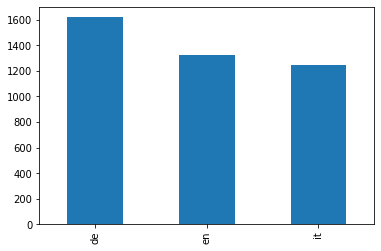

In [ ]:
df['language'].value_counts().plot(kind = 'bar')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
cnt = CountVectorizer(analyzer = 'char',ngram_range=(2,2),binary=True)

cnt.fit(X_train)

len(cnt.get_feature_names_out())

842

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(cnt.transform(X_train),y_train)
y_pred = model.predict(cnt.transform(X_test))

In [ ]:
confusion_matrix(y_test,y_pred)

array([[513,   2,   0],
       [ 11, 412,  14],
       [  3,  15, 415]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          de       0.97      1.00      0.98       515
          en       0.96      0.94      0.95       437
          it       0.97      0.96      0.96       433

    accuracy                           0.97      1385
   macro avg       0.97      0.97      0.97      1385
weighted avg       0.97      0.97      0.97      1385



In [ ]:
model.classes_

array(['de', 'en', 'it'], dtype='<U2')

In [ ]:
test = [
("Ci vediamo domani", 'Italian sentence'),
("See you tomorrow", 'English sentence'),
("I would like a dish of spaghetti or even a good italian pizza", 'English sentence with Italian words'),
("Espresso or cappuccino? I can't choose" , 'English sentence with many Italian words'),
("Espresso o cappuccino?" , 'Italian sentence'),
('Ci vediamo nel weekend', 'Italian sentence with English word'),
('weekend', 'English word'),
('remote work', 'English expression'),
('Weltanschauung', 'German word'),
('Auf Wiedersehen!', 'German expression'),
('Mare', 'Italian word'),
('Buongiorno', 'Italian word'),
('Facciamo una call conference in remote meeting su skype', 'Italian sentence with many English words'),
('hyperparameters', 'English word not present in original corpus'),
('machine learning', 'English expression not present in original corpus '),
('Bitte geben Sie mir Spaghetti und ein Stück Pizza', 'German sentence with Italian words'),
('Ich traf Annalisa in Colosseo und sie sagte mir, sie hätte gerne Spaghetti und ein Stück Pizza', 'German sentence with many Italian words'),
('Vedremo con calma cosa possiamo fare','Italian sentence'),
('Harrier','English word often present in both Italian and English corpus')
        ]

In [ ]:
pred = model.predict(cnt.transform([x[0] for x in test]))

In [ ]:
for i in range(len(test)):
  print("Sentence: {}".format(test[i][0]))
  print("Comment: {}".format(test[i][1]))
  print("Predicted language: {}".format(pred[i]))
  print("-----------------------")

Sentence: Ci vediamo domani
Comment: Italian sentence
Predicted language: it
-----------------------
Sentence: See you tomorrow
Comment: English sentence
Predicted language: en
-----------------------
Sentence: I would like a dish of spaghetti or even a good italian pizza
Comment: English sentence with Italian words
Predicted language: en
-----------------------
Sentence: Espresso or cappuccino? I can't choose
Comment: English sentence with many Italian words
Predicted language: en
-----------------------
Sentence: Espresso o cappuccino?
Comment: Italian sentence
Predicted language: it
-----------------------
Sentence: Ci vediamo nel weekend
Comment: Italian sentence with English word
Predicted language: en
-----------------------
Sentence: weekend
Comment: English word
Predicted language: de
-----------------------
Sentence: remote work
Comment: English expression
Predicted language: en
-----------------------
Sentence: Weltanschauung
Comment: German word
Predicted language: de
------

In [ ]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
print(m2c.export_to_javascript(model))

function score(input) {
    return [((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((((0.7034375409874838) + ((input[0]) * (-0.000002799839301865683))) + ((input[1]) * (-0.0008460671715826153))) + ((input[2]) 

In [ ]:
cnt.get_feature_names_out()

array(['\td', ' "', ' (', ' *', ' -', ' 1', ' 2', ' 3', ' 4', ' 5', ' 6',
       ' 9', ' a', ' b', ' c', ' d', ' e', ' f', ' g', ' h', ' i', ' j',
       ' k', ' l', ' m', ' n', ' o', ' p', ' q', ' r', ' s', ' t', ' u',
       ' v', ' w', ' y', ' z', ' ä', ' è', ' ö', ' ü', ' –', ' —', '" ',
       '",', '"a', '"b', '"d', '"f', '"g', '"i', '"l', '"m', '"n', '"o',
       '"t', '"w', '"y', "' ", "',", "'a", "'d", "'e", "'h", "'i", "'l",
       "'m", "'o", "'s", "'t", "'u", "'v", "'è", '(c', '(e', '(o', '(s',
       ') ', '),', '* ', '+g', ', ', ',"', ',4', '- ', '-1', '-8', '-9',
       '-a', '-b', '-e', '-f', '-g', '-i', '-j', '-l', '-m', '-n', '-p',
       '-s', '-t', '-u', '-v', '-w', '-z', '/+', '/g', '0 ', '00', '01',
       '06', '08', '0s', '1 ', '10', '12', '13', '14', '15', '16', '18',
       '19', '2 ', '2,', '20', '24', '25', '29', '3 ', '30', '31', '39',
       '4 ', '40', '43', '45', '5 ', '53', '6 ', '6,', '60', '64', '7 ',
       '78', '8 ', '8%', '8,', '8-', '83', '86', '